<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,87.808461,84.992590,-39.693105,143.107946,167.996294,-24.888347
1,0.0,1.0,98.387924,86.054862,119.055718,313.498504,181.915488,131.583016
2,0.0,2.0,98.172064,55.985420,33.775684,197.933167,167.185810,30.747357
3,0.0,3.0,90.812070,28.780211,77.938369,207.530650,144.778600,62.752051
4,0.0,4.0,38.302879,24.459489,-76.710197,-3.947828,76.150798,-80.098626
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.094572,98.198409,-192.122889,-33.829908,141.186751,-175.016659
249996,999.0,246.0,90.534238,71.613352,215.881223,388.028813,173.375669,214.653144
249997,999.0,247.0,87.360320,79.922130,127.953885,305.236334,174.422234,130.814100
249998,999.0,248.0,20.665436,91.848846,-202.507445,-79.993164,103.006667,-182.999830


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    87.808461  84.992590  -39.693105  143.107946  167.996294   
      1.0    98.387924  86.054862  119.055718  313.498504  181.915488   
      2.0    98.172064  55.985420   33.775684  197.933167  167.185810   
      3.0    90.812070  28.780211   77.938369  207.530650  144.778600   
      4.0    38.302879  24.459489  -76.710197   -3.947828   76.150798   
...                ...        ...         ...         ...         ...   
999.0 245.0  50.094572  98.198409 -192.122889  -33.829908  141.186751   
      246.0  90.534238  71.613352  215.881223  388.028813  173.375669   
      247.0  87.360320  79.922130  127.953885  305.236334  174.422234   
      248.0  20.665436  91.848846 -202.507445  -79.993164  103.006667   
      249.0  44.469401  48.430383  155.405229  258.305013  106.008139   

                  e_hat  
rep   index              
0.0   0.0    -24.888347  
      1.0    131.583016  
      2.0     30.747357  
      3.0     62.752051  
      4.0    -80.098626  
...                 ...  
999.0 245.0 -175.016659  
      246.0  214.653144  
      247.0  130.814100  
      248.0 -182.999830  
      249.0  152.296874  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    87.808461  84.992590  -39.693105  143.107946  167.996294   
      1.0    98.387924  86.054862  119.055718  313.498504  181.915488   
      2.0    98.172064  55.985420   33.775684  197.933167  167.185810   
      3.0    90.812070  28.780211   77.938369  207.530650  144.778600   
      4.0    38.302879  24.459489  -76.710197   -3.947828   76.150798   
...                ...        ...         ...         ...         ...   
999.0 245.0  50.094572  98.198409 -192.122889  -33.829908  141.186751   
      246.0  90.534238  71.613352  215.881223  388.028813  173.375669   
      247.0  87.360320  79.922130  127.953885  305.236334  174.422234   
      248.0  20.665436  91.848846 -202.507445  -79.993164  103.006667   
      249.0  44.469401  48.430383  155.405229  258.305013  106.008139   

                  e_hat  
rep   index              
0.0   0.0    -24.888347  
      1.0    131.583016  
      2.0     30.747357  
      3.0     62.752051  
      4.0    -80.098626  
...                 ...  
999.0 245.0 -175.016659  
      246.0  214.653144  
      247.0  130.814100  
      248.0 -182.999830  
      249.0  152.296874  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,87.808461,84.992590,-39.693105,143.107946,167.996294,-24.888347
1,0.0,1.0,98.387924,86.054862,119.055718,313.498504,181.915488,131.583016
2,0.0,2.0,98.172064,55.985420,33.775684,197.933167,167.185810,30.747357
3,0.0,3.0,90.812070,28.780211,77.938369,207.530650,144.778600,62.752051
4,0.0,4.0,38.302879,24.459489,-76.710197,-3.947828,76.150798,-80.098626
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.094572,98.198409,-192.122889,-33.829908,141.186751,-175.016659
249996,999.0,246.0,90.534238,71.613352,215.881223,388.028813,173.375669,214.653144
249997,999.0,247.0,87.360320,79.922130,127.953885,305.236334,174.422234,130.814100
249998,999.0,248.0,20.665436,91.848846,-202.507445,-79.993164,103.006667,-182.999830


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    87.808461  84.992590  -39.693105  143.107946  167.996294   
      1.0    98.387924  86.054862  119.055718  313.498504  181.915488   
      2.0    98.172064  55.985420   33.775684  197.933167  167.185810   
      3.0    90.812070  28.780211   77.938369  207.530650  144.778600   
      4.0    38.302879  24.459489  -76.710197   -3.947828   76.150798   
...                ...        ...         ...         ...         ...   
999.0 245.0  50.094572  98.198409 -192.122889  -33.829908  141.186751   
      246.0  90.534238  71.613352  215.881223  388.028813  173.375669   
      247.0  87.360320  79.922130  127.953885  305.236334  174.422234   
      248.0  20.665436  91.848846 -202.507445  -79.993164  103.006667   
      249.0  44.469401  48.430383  155.405229  258.305013  106.008139   

                  e_hat  
rep   index              
0.0   0.0    -24.888347  
      1.0    131.583016  
      2.0     30.747357  
      3.0     62.752051  
      4.0    -80.098626  
...                 ...  
999.0 245.0 -175.016659  
      246.0  214.653144  
      247.0  130.814100  
      248.0 -182.999830  
      249.0  152.296874  

[250000 rows x 6 columns]

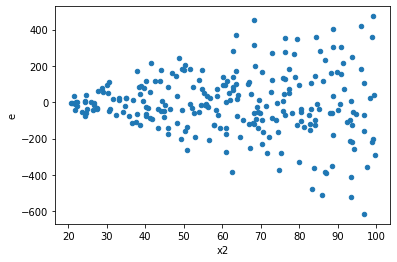

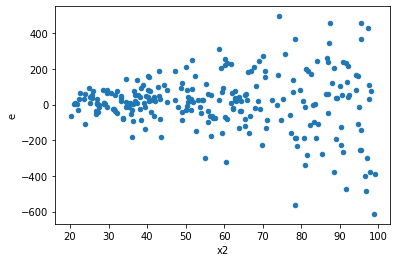

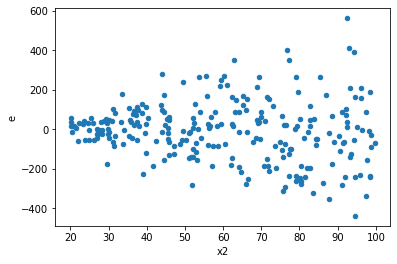

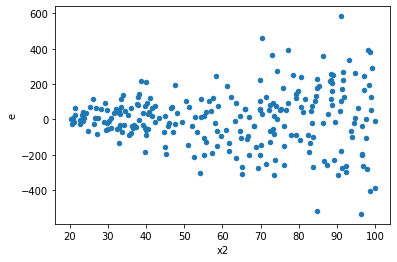

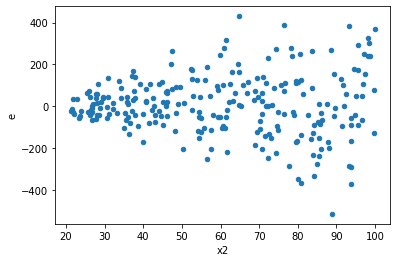

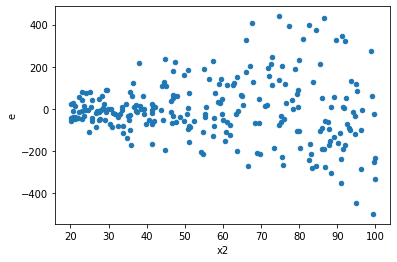

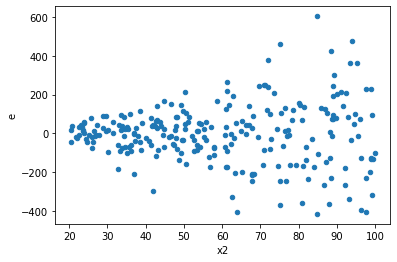

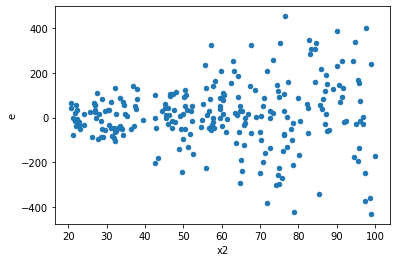

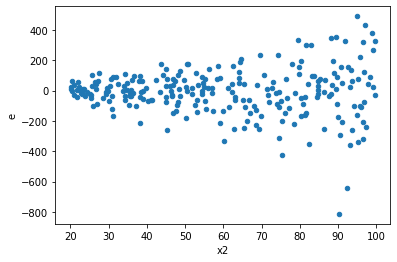

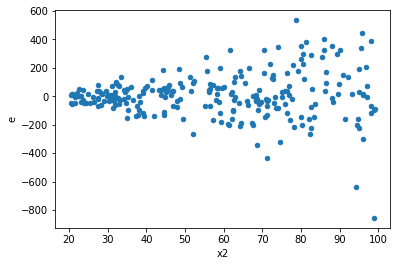

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,123.0,123.0,2910360.64212434,4409839.562083302,23661.468635157235,35852.35416327888,1.5152209998498527,0.02193206719665941,0.9890339664016703,0.010966033598329705,Reject001=1 : Homoscedasticity
1.0,114.0,132.0,2394749.1236176696,4076561.092834502,21006.571259804117,30883.03858207956,1.4701608463430667,0.032779015413692436,0.9836104922931538,0.016389507706846218,Reject001=1 : Homoscedasticity
4.0,131.0,115.0,1950391.7015953008,3158582.8518148414,14888.486271719854,27465.937841868184,1.844777053933196,0.0008674548330351861,0.9995662725834824,0.00043372741651759306,Reject001=0 : Heteroscedasticity
7.0,113.0,133.0,748686.2105138229,4259772.702856512,6625.541685963034,32028.366186891068,4.834075114906728,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,108.0,138.0,1307484.887965263,4486428.582951533,12106.341555233917,32510.352050373425,2.685398549351044,5.530105084972092e-08,0.9999999723494746,2.765052542486046e-08,Reject001=0 : Heteroscedasticity
10.0,112.0,134.0,831949.2411768823,3784357.5209520566,7428.118224793592,28241.474036955646,3.8019688408689003,4.143352327901084e-13,0.9999999999997928,2.071676163950542e-13,Reject001=0 : Heteroscedasticity
12.0,118.0,128.0,718184.4257432749,3891400.7251488194,6086.308692739617,30401.56816522515,4.995074962512386,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
13.0,129.0,117.0,1381335.7969957837,3851051.4234584365,10708.029434075843,32914.96943126869,3.073858699577755,1.9603252354727374e-09,0.9999999990198374,9.801626177363687e-10,Reject001=0 : Heteroscedasticity
14.0,106.0,140.0,498804.1594511548,4975443.92472012,4705.699617463724,35538.88517657229,7.552306365812406,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,123.0,123.0,2910360.64212434,4409839.562083302,23661.468635157235,35852.35416327888,1.5152209998498527,0.02193206719665941,Reject001=1 : Homoscedasticity
1.0,114.0,132.0,2394749.1236176696,4076561.092834502,21006.571259804117,30883.03858207956,1.4701608463430667,0.032779015413692436,Reject001=1 : Homoscedasticity
2.0,121.0,125.0,2885644.665751327,2591547.3513541347,23848.303022738237,20732.378810833077,0.8693439860717019,0.4394264617137664,Reject001=1 : Homoscedasticity
3.0,133.0,113.0,4360436.707920114,1798563.1469105382,32785.23840541439,15916.488025756975,0.4854772696460981,6.700058200349374e-05,Reject001=0 : Heteroscedasticity
4.0,131.0,115.0,1950391.7015953008,3158582.8518148414,14888.486271719854,27465.937841868184,1.844777053933196,0.0008674548330351861,Reject001=0 : Heteroscedasticity
5.0,123.0,123.0,3369577.0015756264,1931321.8892660008,27394.934972159564,15701.803977772364,0.5731644916744468,0.0022086964707609064,Reject001=0 : Heteroscedasticity
6.0,135.0,111.0,4153313.315793179,1731010.4840275736,30765.283820690216,15594.689045293457,0.5068924160161897,0.000174271003449522,Reject001=0 : Heteroscedasticity
7.0,113.0,133.0,748686.2105138229,4259772.702856512,6625.541685963034,32028.366186891068,4.834075114906728,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,108.0,138.0,1307484.887965263,4486428.582951533,12106.341555233917,32510.352050373425,2.685398549351044,5.530105084972092e-08,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    794
Reject001=1 : Homoscedasticity      206
Name: Result_test, dtype: int64